In [1]:
from fastai.vision.all import *

In [2]:

# Define the path to your data folder
path = Path("../images/")

# Define the transformations to be applied to the images
# Adjust these based on the characteristics of your small images
item_tfms = [Resize(32)]  # Resize to a larger size for better model training
batch_tfms = []


In [3]:
# Create DataBlock using the from_folder method
# Make sure to specify the item_tfms and batch_tfms
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=GrandparentSplitter(train_name='train', valid_name='valid'),
                   item_tfms=item_tfms,
                   batch_tfms=batch_tfms)

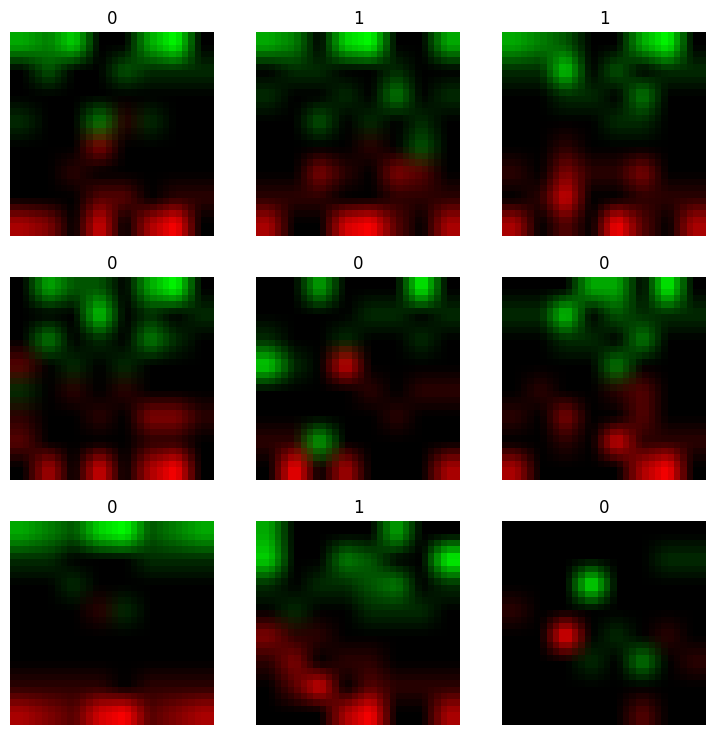

In [4]:
# Create DataLoaders using the dataloaders method
# Pass the path to the data folder and batch size
dls = dblock.dataloaders(path, bs=64)

# Show a batch of data to check if everything is working fine
dls.show_batch()

In [5]:
# Define the learner using a pre-trained ResNet18 model
learn = vision_learner(dls, resnet18, metrics=error_rate)

# Find a suitable learning rate using the learning rate finder
#lr_rec = learn.lr_find()
#lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [6]:
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.828094,0.729576,0.488145,00:15
1,0.724710,0.743715,0.505834,00:13
2,0.687234,0.727745,0.494166,00:12


SuggestedLRs(valley=2.0892961401841603e-05)

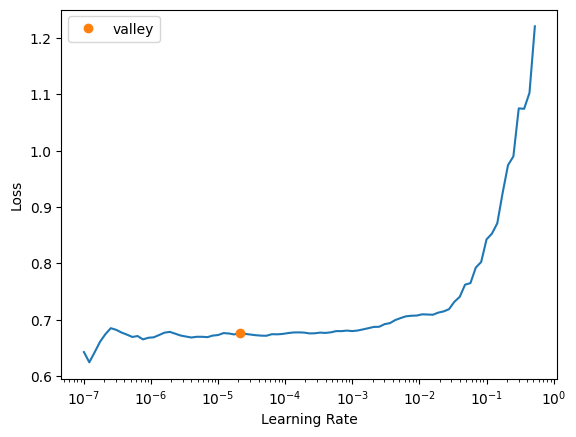

In [7]:
learn.unfreeze()
learn.lr_find()

In [8]:
# Fine-tune the model using the one-cycle policy
learn.fit_one_cycle(6, lr_max=1e-5)

# Show the results
learn.show_results()

epoch,train_loss,valid_loss,error_rate,time


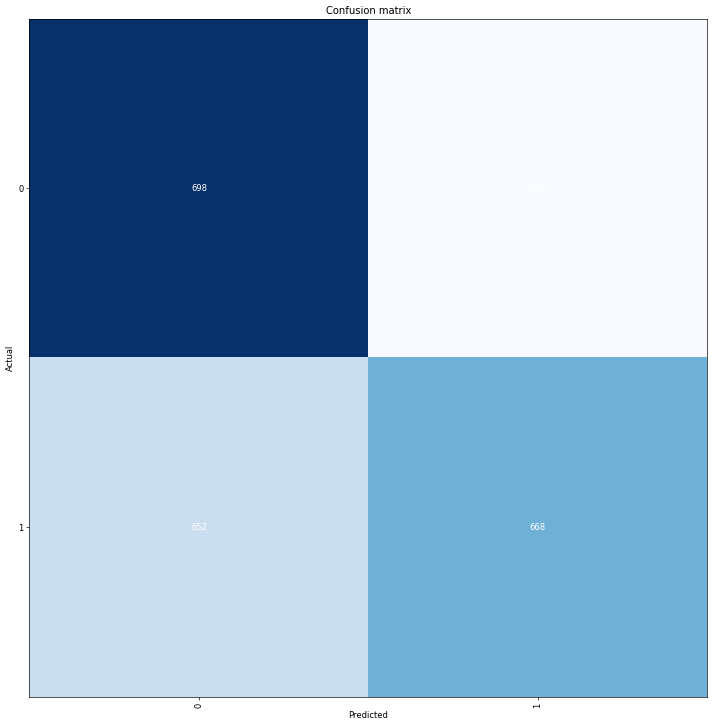

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)